<a href="https://colab.research.google.com/github/anacasicande/Modelamiento/blob/main/parcial2againmodela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

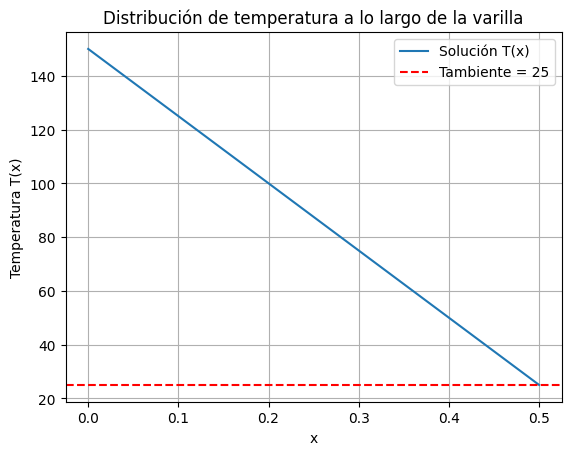

El valor óptimo de dT/dx(0) es: -250.00078125000027


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fmin
import matplotlib.pyplot as plt

# Definir parámetros ajustados
T0 = 150  # Condición en x=0
TL = 25 # Condición en x=L
L = 0.5   # Longitud de la varilla
h_prime = 10 # Coeficiente h', ajustado para obtener resultados más manejables
k=200
p=0.1
a=0.005

# Definir el sistema de ecuaciones diferenciales
def sistema_ecuaciones(x, y):
    T, dTdx = y
    d2Tdx2 = (h_prime * (T0 - TL)*p)/k*a
    return [dTdx, d2Tdx2]

# Función para disparar (shooting method)
def disparo(dT0):
    # Convertimos dT0 a escalar si es una lista o array
    dT0 = np.asarray(dT0).item()  # Esto asegura que sea un escalar
    # Condiciones iniciales [T(0), dT/dx(0)]
    y0 = [T0, dT0]
    # Resolver la ODE desde 0 hasta L
    sol = solve_ivp(sistema_ecuaciones, [0, L], y0, t_eval=np.linspace(0, L, 100))
    return sol

# Función de error que compara T(L) con la condición deseada
def error_shooting(dT0):
    sol = disparo(dT0)
    T_L = sol.y[0, -1]  # Valor de T en x=L
    return abs(T_L - TL)  # Usamos valor absoluto para evitar valores negativos

# Minimizar el error usando fmin (ajustar el valor inicial dT0)
sol_shooting = fmin(error_shooting, x0=[1.0], disp=False)  # Se inicia con un valor escalar

# Obtener la solución final usando el valor de dT/dx(0) obtenido
sol_final = disparo(sol_shooting[0])

# Graficar la solución
x_vals = sol_final.t
T_vals = sol_final.y[0]

plt.plot(x_vals, T_vals, label=f"Solución T(x)")
plt.xlabel('x')
plt.ylabel('Temperatura T(x)')
plt.title('Distribución de temperatura a lo largo de la varilla')
plt.axhline(y=TL, color='r', linestyle='--', label=f'Tambiente = {TL}')
plt.legend()
plt.grid(True)
plt.show()

# Devolver el valor óptimo de dT/dx(0)
print(f"El valor óptimo de dT/dx(0) es: {sol_shooting[0]}")


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fmin
import matplotlib.pyplot as plt

Co=2
K=0.5

def calcular_x()